In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('NG_22dec.csv')

C:\Users\Bhawit Balodi\AppData\Local\Temp\ipykernel_13936\2437384017.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NG_22dec.csv')


In [3]:
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C
0,0.5,3.94214,1.24797,0.00000
1,1.0,3.94504,1.24789,0.81737
2,2.0,3.94806,1.24790,2.16510
3,3.0,3.95068,1.24790,3.33812
4,4.0,3.95281,1.24790,4.67338


In [4]:
df.isnull().sum()

Time/sec       0
Potential/V    0
Current/A      0
Charge/C       0
dtype: int64

In [5]:
df.loc[df['Time/sec']=='######.#']  # checking for the string values 

,Time/sec,Potential/V,Current/A,Charge/C
994879,######.#,4.17935,0.00000,2964.880
994880,######.#,4.17936,0.00000,2964.880
994881,######.#,4.17934,0.00000,2964.880
994882,######.#,4.17935,0.00000,2964.880
994883,######.#,4.17934,0.00000,2964.880
...,...,...,...,...
1048566,######.#,3.99802,1.24720,-335.933
1048567,######.#,3.99817,1.24720,-334.761
1048568,######.#,3.99830,1.24719,-333.588
1048569,######.#,3.99844,1.24719,-332.242


In [6]:
df.rename(columns={'Time/sec': 'Time', 'Potential/V': 'Potential','Current/A': 'Current','Charge/C': 'Charge'}, inplace=True)

In [7]:
df.drop(df.index[994879:1048571],axis = 0, inplace = True)   # Removing the #### values 

In [8]:
df.shape

(994879, 4)

In [9]:
df.insert(loc=3, column='Capacity', value = df['Charge']/3600)  # Adding the column

In [10]:
df['Time'] = df['Time'].astype(float)  # converting object values to float values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   Charge     994879 non-null  float64
dtypes: float64(5)
memory usage: 38.0 MB


Text(0.5, 1.0, 'Capacity vs TIme')

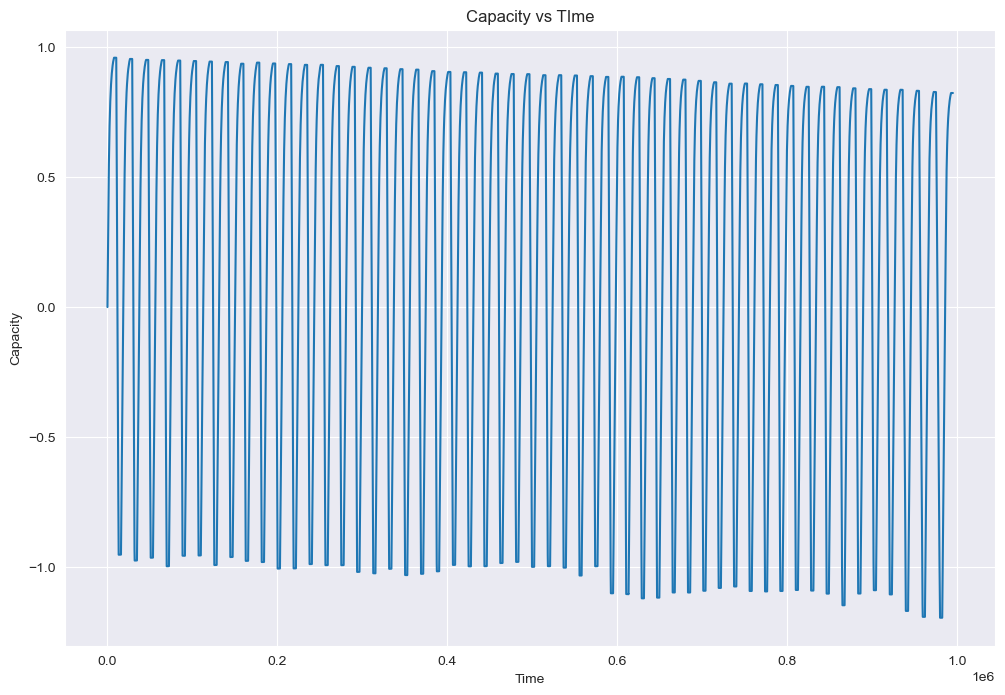

In [12]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Capacity'])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

# Local Maxima and Minima

CPU times: total: 5min 56s
Wall time: 6min


C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Local Maxima and Local Minima')

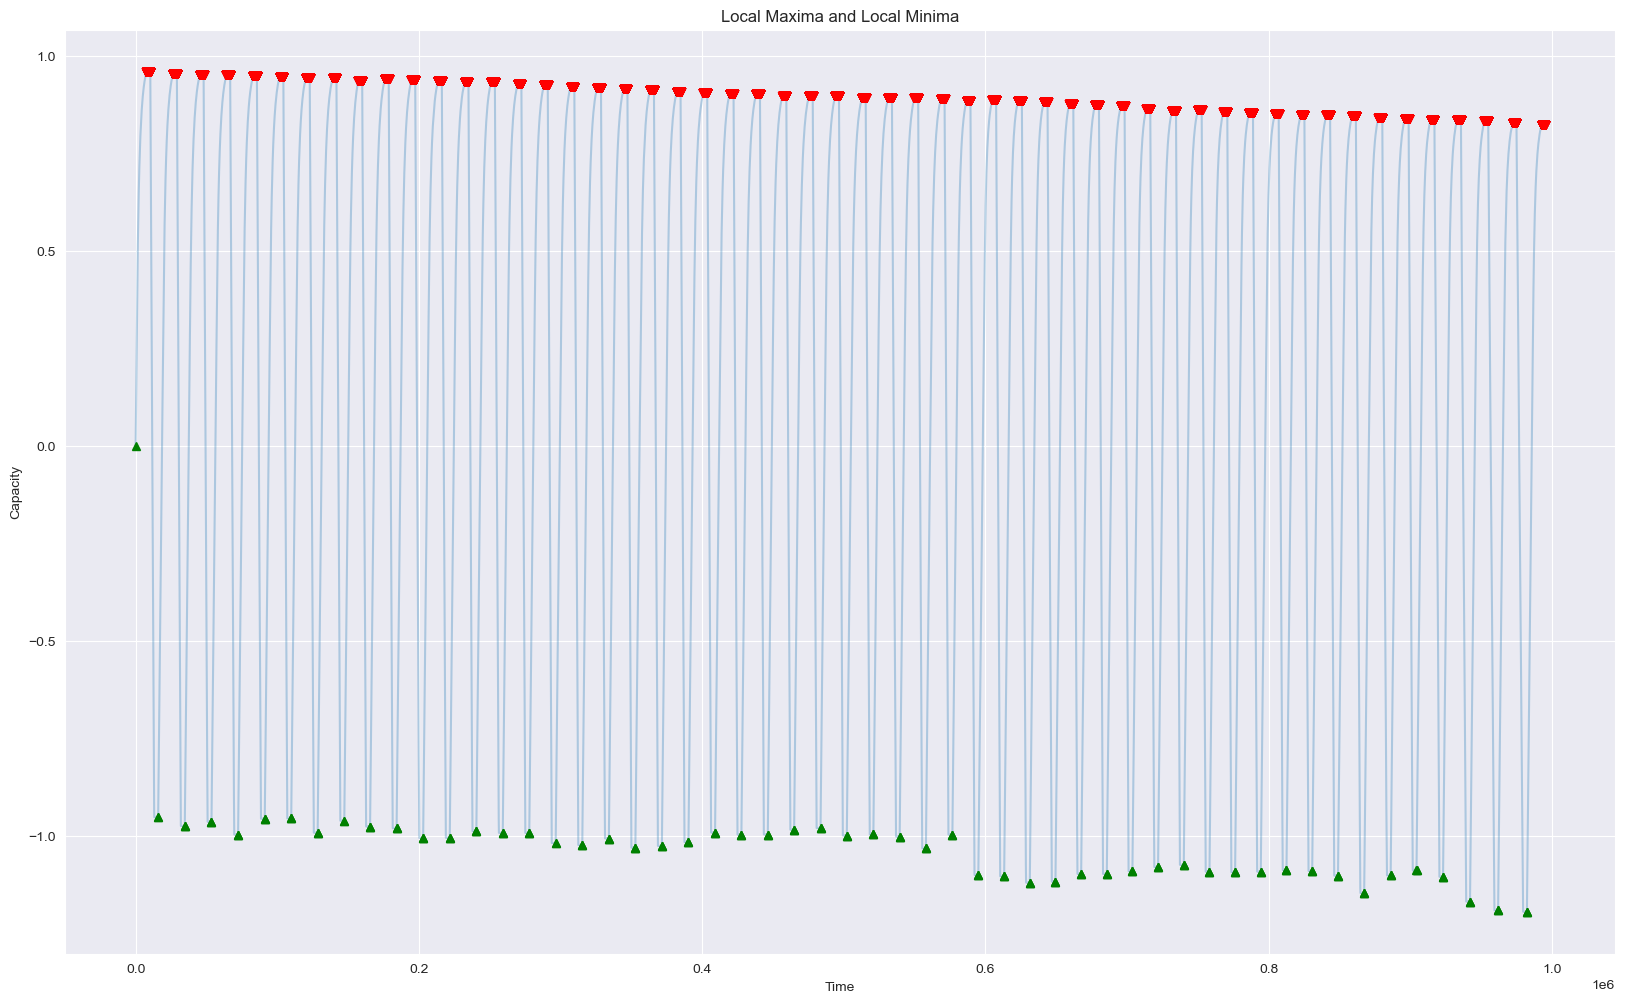

In [13]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(df.Capacity.values, np.less_equal, order=5000)[0]
ilocs_max = argrelextrema(df.Capacity.values, np.greater_equal, order=5000)[0]

df.Capacity.plot(figsize=(20,12), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
df.iloc[ilocs_max].Capacity.plot(style='.', lw=1, color='red', marker="v");
df.iloc[ilocs_min].Capacity.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [14]:
maximum_point = df['Capacity'][ilocs_max].unique()
minimum_point = df['Capacity'][ilocs_min].unique()

In [15]:
print(maximum_point)
print(maximum_point.max())
print(minimum_point)

[0.95931944 0.95455    0.95088889 0.95006389 0.94838889 0.94654722
 0.94444722 0.94270278 0.93617778 0.940475   0.93714722 0.93475278
 0.93185278 0.93199444 0.92716944 0.92424722 0.92075278 0.91866944
 0.91525    0.91343333 0.90770833 0.90459167 0.90346111 0.90203333
 0.89824167 0.896575   0.89607222 0.89202222 0.89213611 0.89085556
 0.88832778 0.88545556 0.88612778 0.8842     0.88057778 0.87751389
 0.87505278 0.87025556 0.8649     0.85945    0.85999167 0.85715833
 0.85434444 0.85090833 0.84737222 0.84766667 0.84604444 0.84154444
 0.83846389 0.83609722 0.83606667 0.83217778 0.82765556 0.82357778]
0.9593194444444445
[ 0.         -0.95302222 -0.97546389 -0.96463333 -0.99741667 -0.95675833
 -0.95597778 -0.99267778 -0.96201111 -0.97678611 -0.98126111 -1.00638611
 -1.00568333 -0.989225   -0.99324167 -0.99336111 -1.01925278 -1.024275
 -1.00729444 -1.03115278 -1.02656667 -1.01694444 -0.99236667 -0.99746111
 -0.99722778 -0.98508056 -0.98075833 -0.99984722 -0.99675556 -1.00235556
 -1.03265833 -

In [16]:
df.insert(loc=4,column='SOC',value = df['Capacity']/0.96)

In [17]:
df.head(20)

,Time,Potential,Current,Capacity,SOC,Charge
0,0.5,3.94214,1.24797,0.000000,0.000000,0.00000
1,1.0,3.94504,1.24789,0.000227,0.000237,0.81737
2,2.0,3.94806,1.24790,0.000601,0.000626,2.16510
3,3.0,3.95068,1.24790,0.000927,0.000966,3.33812
4,4.0,3.95281,1.24790,0.001298,0.001352,4.67338
5,5.0,3.95467,1.24789,0.001624,0.001692,5.84639
6,6.0,3.95637,1.24791,0.001995,0.002078,7.18165
7,7.0,3.95793,1.24789,0.002321,0.002417,8.35467
8,8.0,3.95938,1.24790,0.002692,0.002804,9.68992
9,9.0,3.96077,1.24789,0.003017,0.003143,10.86290


# Integral current

In [18]:
from scipy.integrate import cumulative_trapezoid

p = df["Time"][:df.shape[0]]
q = df["Current"][:df.shape[0]]

integral = (cumulative_trapezoid(q,p,initial=0))/(3600*0.96)

df.loc[:, "Integral_current"] = integral

Text(0.5, 1.0, 'Dataset')

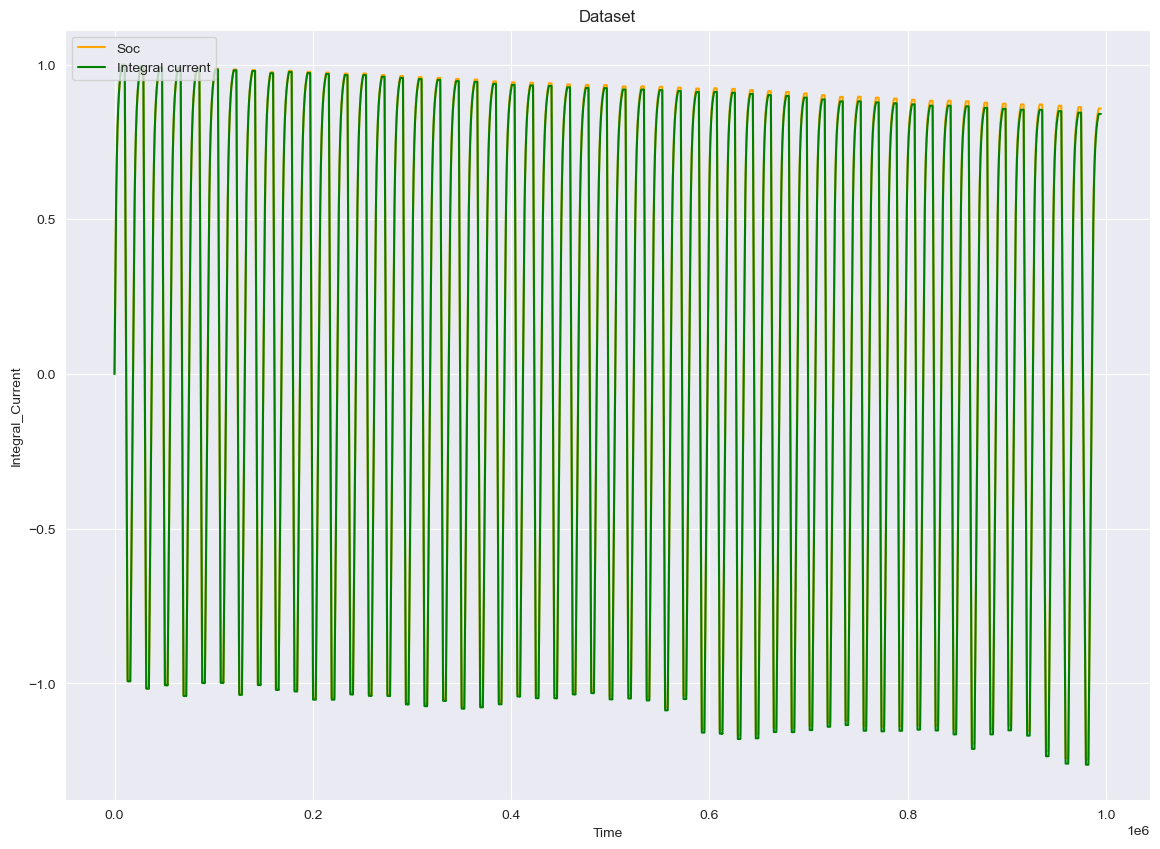

In [19]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['SOC'],color='orange')
plt.plot(df['Integral_current'],color='green')
plt.ylabel('Integral_Current')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

In [20]:
df.head()

,Time,Potential,Current,Capacity,SOC,Charge,Integral_current
0,0.5,3.94214,1.24797,0.000000,0.000000,0.00000,0.000000
1,1.0,3.94504,1.24789,0.000227,0.000237,0.81737,0.000181
2,2.0,3.94806,1.24790,0.000601,0.000626,2.16510,0.000542
3,3.0,3.95068,1.24790,0.000927,0.000966,3.33812,0.000903
4,4.0,3.95281,1.24790,0.001298,0.001352,4.67338,0.001264


In [21]:
df.insert(loc = 5,column ='Energy',value=df['Integral_current']*df["Potential"]) # do add if needed 

In [22]:
df.describe()

,Time,Potential,Current,Capacity,SOC,Energy,Charge,Integral_current
count,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000
mean,501042.738163,3.886127,0.002878,0.146517,0.152622,0.786177,527.461697,0.142881
std,288767.217690,0.382038,1.142440,0.752569,0.783926,2.992199,2709.247496,0.784457
min,0.500000,2.750290,-2.503150,-1.195086,-1.244881,-4.550012,-4302.310000,-1.262688
25%,250933.600000,3.475400,0.000000,-0.602635,-0.627745,-2.255127,-2169.485000,-0.637721
50%,501905.600000,4.147310,0.072232,0.455186,0.474152,1.844648,1638.670000,0.464311
75%,751231.300000,4.199370,0.795196,0.839904,0.874900,3.607332,3023.655000,0.862360
max,999999.600000,4.199950,1.364510,0.959319,0.999291,4.196637,3453.550000,0.999371


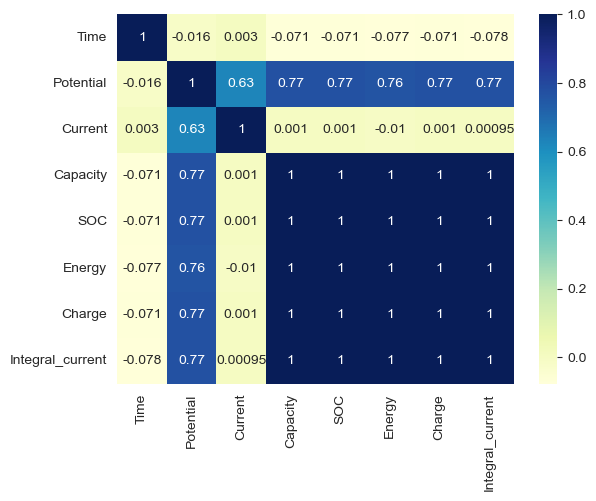

<Figure size 1400x1000 with 0 Axes>

In [23]:
import seaborn as sn
dataplot = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.figure(figsize = (14,10))
plt.show()

# Modeling

In [24]:
timest = df.pop('Time')

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Potential','Current','Capacity','Charge','SOC','Integral_current'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [26]:
df.head()

,Potential,Current,Capacity,SOC,Energy,Charge,Integral_current
0,0.822158,0.969868,0.554717,0.554717,0.000000,0.554717,0.558203
1,0.824159,0.969847,0.554823,0.554823,0.000712,0.554823,0.558283
2,0.826242,0.969850,0.554996,0.554996,0.002138,0.554996,0.558443
3,0.828049,0.969850,0.555148,0.555148,0.003566,0.555148,0.558602
4,0.829519,0.969850,0.555320,0.555320,0.004996,0.555320,0.558762


In [27]:
Y = df.pop('Energy')
X = df

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [29]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((795903, 6), (198976, 6), (795903,), (198976,))

In [30]:
X_train.head()

,Potential,Current,Capacity,SOC,Charge,Integral_current
346194,0.986997,0.647200,0.979544,0.979544,0.979544,0.976540
363907,0.989618,0.647200,0.978701,0.978701,0.978701,0.975575
352886,0.669509,0.969871,0.087074,0.087074,0.087074,0.090924
898546,0.985700,0.647200,0.943903,0.943903,0.943903,0.937006
367830,0.232606,0.000295,0.373137,0.373137,0.373137,0.374682


In [31]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:

callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 15,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

# AIC Function

In [34]:
#  Function for the AIC 

import tensorflow as tf
from scipy.stats import norm

# Train your model using TensorFlow
def AIC_value(model,Y_pred,Y_test):
    # model = model_1

    Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
    Y_pred_1 = np.asarray(Y_pred).astype('float32').reshape((-1,1))


    # Calculate the negative log-likelihood of the model's parameters based on the training data
    nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

    # Calculate the number of parameters in the model
    num_params = model.count_params()

    # Calculate the AIC value for the model
    aic = 2 * num_params - 2 * nll

    # Print the AIC value
    print("AIC: ", aic.numpy())

# Modeling

In [35]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(80,activation = 'linear'),
                               tf.keras.layers.Dense(50, activation = 'linear'),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_1 = model_1.fit(X_train,Y_train, epochs= 100,batch_size=128,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.1464 - rmse: 0.3049 - mae: 0.1464 - mse: 0.0929 - mape: 249.8898 - val_loss: 0.1293 - val_rmse: 0.2159 - val_mae: 0.1293 - val_mse: 0.0466 - val_mape: 22.7179
Epoch 2/100
6218/6218 [==============================] - 17s 3ms/step - loss: 0.1255 - rmse: 0.2147 - mae: 0.1255 - mse: 0.0461 - mape: 271.4636 - val_loss: 0.1221 - val_rmse: 0.2119 - val_mae: 0.1221 - val_mse: 0.0449 - val_mape: 23.3968
Epoch 3/100
6218/6218 [==============================] - 16s 3ms/step - loss: 0.1224 - rmse: 0.2138 - mae: 0.1224 - mse: 0.0457 - mape: 188.3192 - val_loss: 0.1186 - val_rmse: 0.2105 - val_mae: 0.1186 - val_mse: 0.0443 - val_mape: 24.5154
Epoch 4/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.1179 - rmse: 0.2126 - mae: 0.1179 - mse: 0.0452 - mape: 241.6708 - val_loss: 0.1150 - val_rmse: 0.2134 - val_mae: 0.1150 - val_mse: 0.0455 - val_mape: 24.4170
Epoch 5/100
6218/6218 [=====================

6218/6218 [==============================] - 24s 4ms/step - loss: 0.1117 - rmse: 0.2118 - mae: 0.1117 - mse: 0.0449 - mape: 166.2626 - val_loss: 0.1115 - val_rmse: 0.2120 - val_mae: 0.1115 - val_mse: 0.0449 - val_mape: 24.5736
Epoch 36/100
6218/6218 [==============================] - 25s 4ms/step - loss: 0.1117 - rmse: 0.2118 - mae: 0.1117 - mse: 0.0449 - mape: 156.8458 - val_loss: 0.1120 - val_rmse: 0.2142 - val_mae: 0.1120 - val_mse: 0.0459 - val_mape: 24.7735
Epoch 37/100
6218/6218 [==============================] - 25s 4ms/step - loss: 0.1117 - rmse: 0.2118 - mae: 0.1117 - mse: 0.0449 - mape: 160.7870 - val_loss: 0.1117 - val_rmse: 0.2134 - val_mae: 0.1117 - val_mse: 0.0455 - val_mape: 24.6794
Epoch 38/100
6218/6218 [==============================] - 25s 4ms/step - loss: 0.1117 - rmse: 0.2119 - mae: 0.1117 - mse: 0.0449 - mape: 155.7641 - val_loss: 0.1120 - val_rmse: 0.2123 - val_mae: 0.1120 - val_mse: 0.0451 - val_mape: 24.4575
Epoch 39/100
6218/6218 [=============================

6218/6218 [==============================] - 14s 2ms/step - loss: 0.1115 - rmse: 0.2118 - mae: 0.1115 - mse: 0.0449 - mape: 172.4718 - val_loss: 0.1131 - val_rmse: 0.2119 - val_mae: 0.1131 - val_mse: 0.0449 - val_mape: 24.6367
Epoch 70/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.1115 - rmse: 0.2118 - mae: 0.1115 - mse: 0.0449 - mape: 154.7667 - val_loss: 0.1116 - val_rmse: 0.2155 - val_mae: 0.1116 - val_mse: 0.0465 - val_mape: 25.7268
Epoch 71/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.1115 - rmse: 0.2119 - mae: 0.1115 - mse: 0.0449 - mape: 163.3137 - val_loss: 0.1115 - val_rmse: 0.2125 - val_mae: 0.1115 - val_mse: 0.0452 - val_mape: 24.6795
Epoch 72/100
6218/6218 [==============================] - 16s 3ms/step - loss: 0.1115 - rmse: 0.2118 - mae: 0.1115 - mse: 0.0449 - mape: 158.1024 - val_loss: 0.1115 - val_rmse: 0.2138 - val_mae: 0.1115 - val_mse: 0.0457 - val_mape: 25.1922
Epoch 72: early stopping
CPU times: total: 37min 13s


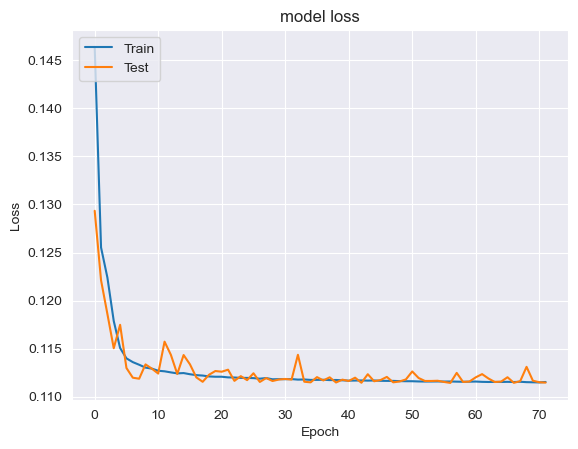

In [36]:
plot_his(history_1)

In [37]:
model_1.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 0.1115 - rmse: 0.2138 - mae: 0.1115 - mse: 0.0457 - mape: 25.1922


[0.11145471781492233,
 0.21375298500061035,
 0.11145471781492233,
 0.04569033905863762,
 25.19220733642578]

In [38]:
Y_pred_1 = model_1.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [39]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                560       
                                                                 
 dense_1 (Dense)             (None, 50)                4050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5,651
Trainable params: 5,651
Non-trainable params: 0
_________________________________________________________________


In [40]:
AIC_value(model_1,Y_pred_1,Y_test)

AIC:  11317.414


# Model 2

In [41]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_2 = model_2.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 54s 2ms/step - loss: 0.0224 - rmse: 0.1284 - mae: 0.0224 - mse: 0.0165 - mape: 34.2471 - val_loss: 0.0104 - val_rmse: 0.0150 - val_mae: 0.0104 - val_mse: 2.2512e-04 - val_mape: 1.8605
Epoch 2/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0095 - rmse: 0.0135 - mae: 0.0095 - mse: 1.8198e-04 - mape: 16.5569 - val_loss: 0.0085 - val_rmse: 0.0120 - val_mae: 0.0085 - val_mse: 1.4379e-04 - val_mape: 1.9465
Epoch 3/100
24872/24872 [==============================] - 53s 2ms/step - loss: 0.0082 - rmse: 0.0114 - mae: 0.0082 - mse: 1.2924e-04 - mape: 21.4789 - val_loss: 0.0085 - val_rmse: 0.0110 - val_mae: 0.0085 - val_mse: 1.2165e-04 - val_mape: 1.9592
Epoch 4/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0076 - rmse: 0.0105 - mae: 0.0076 - mse: 1.0921e-04 - mape: 19.8968 - val_loss: 0.0073 - val_rmse: 0.0103 - val_mae: 0.0073 - val_mse: 1.0691e-04 - val_mape: 1.5455
Epoch 5/100
2487

24872/24872 [==============================] - 55s 2ms/step - loss: 0.0056 - rmse: 0.0081 - mae: 0.0056 - mse: 6.5393e-05 - mape: 3.3480 - val_loss: 0.0056 - val_rmse: 0.0081 - val_mae: 0.0056 - val_mse: 6.5914e-05 - val_mape: 1.1956
Epoch 35/100
24872/24872 [==============================] - 56s 2ms/step - loss: 0.0056 - rmse: 0.0081 - mae: 0.0056 - mse: 6.5053e-05 - mape: 2.8763 - val_loss: 0.0056 - val_rmse: 0.0081 - val_mae: 0.0056 - val_mse: 6.5146e-05 - val_mape: 1.1914
Epoch 36/100
24872/24872 [==============================] - 52s 2ms/step - loss: 0.0056 - rmse: 0.0080 - mae: 0.0056 - mse: 6.4734e-05 - mape: 3.2391 - val_loss: 0.0056 - val_rmse: 0.0081 - val_mae: 0.0056 - val_mse: 6.4926e-05 - val_mape: 1.1900
Epoch 37/100
24872/24872 [==============================] - 52s 2ms/step - loss: 0.0056 - rmse: 0.0080 - mae: 0.0056 - mse: 6.4375e-05 - mape: 4.1320 - val_loss: 0.0056 - val_rmse: 0.0079 - val_mae: 0.0056 - val_mse: 6.2894e-05 - val_mape: 1.1655
Epoch 38/100
24872/24872 

24872/24872 [==============================] - 56s 2ms/step - loss: 0.0052 - rmse: 0.0076 - mae: 0.0052 - mse: 5.7745e-05 - mape: 9.1330 - val_loss: 0.0052 - val_rmse: 0.0076 - val_mae: 0.0052 - val_mse: 5.7946e-05 - val_mape: 1.1242
Epoch 68/100
24872/24872 [==============================] - 52s 2ms/step - loss: 0.0052 - rmse: 0.0076 - mae: 0.0052 - mse: 5.7578e-05 - mape: 8.7631 - val_loss: 0.0052 - val_rmse: 0.0076 - val_mae: 0.0052 - val_mse: 5.7865e-05 - val_mape: 1.1234
Epoch 69/100
24872/24872 [==============================] - 52s 2ms/step - loss: 0.0052 - rmse: 0.0076 - mae: 0.0052 - mse: 5.7401e-05 - mape: 9.1215 - val_loss: 0.0052 - val_rmse: 0.0076 - val_mae: 0.0052 - val_mse: 5.7411e-05 - val_mape: 1.1198
Epoch 70/100
24872/24872 [==============================] - 53s 2ms/step - loss: 0.0052 - rmse: 0.0076 - mae: 0.0052 - mse: 5.7237e-05 - mape: 10.0232 - val_loss: 0.0052 - val_rmse: 0.0075 - val_mae: 0.0052 - val_mse: 5.6635e-05 - val_mape: 1.1124
Epoch 71/100
24872/24872

24872/24872 [==============================] - 53s 2ms/step - loss: 0.0050 - rmse: 0.0073 - mae: 0.0050 - mse: 5.3159e-05 - mape: 10.9054 - val_loss: 0.0050 - val_rmse: 0.0073 - val_mae: 0.0050 - val_mse: 5.3868e-05 - val_mape: 1.0812
CPU times: total: 2h 21min
Wall time: 1h 30min 6s


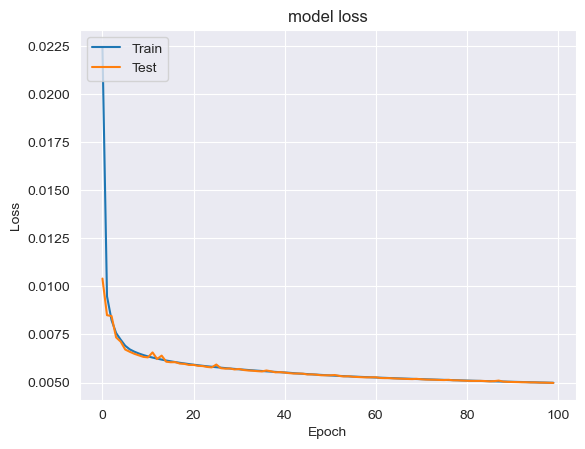

In [42]:
plot_his(history_2)

In [43]:
model_2.evaluate(X_test,Y_test)

6218/6218 [==============================] - 10s 2ms/step - loss: 0.0050 - rmse: 0.0073 - mae: 0.0050 - mse: 5.3868e-05 - mape: 1.0812


[0.004980124533176422,
 0.007339491508901119,
 0.004980124533176422,
 5.3868137911194935e-05,
 1.0812047719955444]

In [44]:
Y_pred_2 = model_2.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [45]:
AIC_value(model_2,Y_pred_2,Y_test)

AIC:  11617.302


# Model 3

In [46]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(70),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_3 = model_3.fit(X_train,Y_train,batch_size=128, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
6218/6218 [==============================] - 16s 2ms/step - loss: 0.0501 - rmse: 0.2777 - mae: 0.0501 - mse: 0.0771 - mape: 30.9144 - val_loss: 0.0118 - val_rmse: 0.0153 - val_mae: 0.0118 - val_mse: 2.3441e-04 - val_mape: 2.2440
Epoch 2/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.0128 - rmse: 0.0166 - mae: 0.0128 - mse: 2.7675e-04 - mape: 41.5832 - val_loss: 0.0140 - val_rmse: 0.0172 - val_mae: 0.0140 - val_mse: 2.9622e-04 - val_mape: 2.2382
Epoch 3/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.0104 - rmse: 0.0135 - mae: 0.0104 - mse: 1.8121e-04 - mape: 24.0222 - val_loss: 0.0111 - val_rmse: 0.0139 - val_mae: 0.0111 - val_mse: 1.9294e-04 - val_mape: 1.6199
Epoch 4/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.0087 - rmse: 0.0113 - mae: 0.0087 - mse: 1.2807e-04 - mape: 23.0066 - val_loss: 0.0069 - val_rmse: 0.0091 - val_mae: 0.0069 - val_mse: 8.3115e-05 - val_mape: 1.0928
Epoch 5/100
6218/6218 [=

6218/6218 [==============================] - 16s 3ms/step - loss: 0.0038 - rmse: 0.0066 - mae: 0.0038 - mse: 4.2965e-05 - mape: 27.9523 - val_loss: 0.0036 - val_rmse: 0.0066 - val_mae: 0.0036 - val_mse: 4.2949e-05 - val_mape: 0.7436
Epoch 35/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.0038 - rmse: 0.0065 - mae: 0.0038 - mse: 4.2862e-05 - mape: 22.8061 - val_loss: 0.0036 - val_rmse: 0.0064 - val_mae: 0.0036 - val_mse: 4.1503e-05 - val_mape: 0.7939
Epoch 36/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.0038 - rmse: 0.0065 - mae: 0.0038 - mse: 4.2805e-05 - mape: 26.9706 - val_loss: 0.0037 - val_rmse: 0.0064 - val_mae: 0.0037 - val_mse: 4.1243e-05 - val_mape: 0.7846
Epoch 37/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.0038 - rmse: 0.0065 - mae: 0.0038 - mse: 4.2778e-05 - mape: 21.8300 - val_loss: 0.0036 - val_rmse: 0.0065 - val_mae: 0.0036 - val_mse: 4.2798e-05 - val_mape: 0.6688
Epoch 38/100
6218/6218 [=====

6218/6218 [==============================] - 14s 2ms/step - loss: 0.0034 - rmse: 0.0065 - mae: 0.0034 - mse: 4.2360e-05 - mape: 26.8965 - val_loss: 0.0034 - val_rmse: 0.0064 - val_mae: 0.0034 - val_mse: 4.1457e-05 - val_mape: 0.6743
Epoch 68/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.0034 - rmse: 0.0065 - mae: 0.0034 - mse: 4.2406e-05 - mape: 25.3558 - val_loss: 0.0033 - val_rmse: 0.0065 - val_mae: 0.0033 - val_mse: 4.2053e-05 - val_mape: 0.6807
Epoch 69/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.0034 - rmse: 0.0065 - mae: 0.0034 - mse: 4.2350e-05 - mape: 25.9979 - val_loss: 0.0033 - val_rmse: 0.0064 - val_mae: 0.0033 - val_mse: 4.1582e-05 - val_mape: 0.6927
Epoch 70/100
6218/6218 [==============================] - 14s 2ms/step - loss: 0.0034 - rmse: 0.0065 - mae: 0.0034 - mse: 4.2330e-05 - mape: 26.2949 - val_loss: 0.0033 - val_rmse: 0.0065 - val_mae: 0.0033 - val_mse: 4.2649e-05 - val_mape: 0.6388
Epoch 71/100
6218/6218 [=====

6218/6218 [==============================] - 15s 2ms/step - loss: 0.0033 - rmse: 0.0065 - mae: 0.0033 - mse: 4.1824e-05 - mape: 40.5679 - val_loss: 0.0032 - val_rmse: 0.0065 - val_mae: 0.0032 - val_mse: 4.1619e-05 - val_mape: 0.6470
CPU times: total: 43min 52s
Wall time: 26min 20s


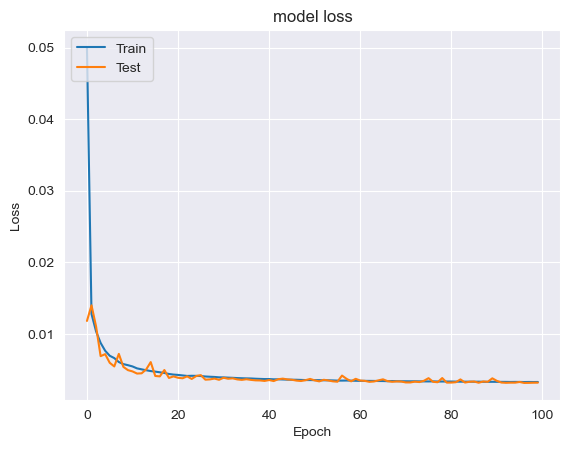

In [47]:
plot_his(history_3)

In [48]:
model_3.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 0.0032 - rmse: 0.0065 - mae: 0.0032 - mse: 4.1618e-05 - mape: 0.6470


[0.0031778996344655752,
 0.006451236084103584,
 0.0031778996344655752,
 4.161844844929874e-05,
 0.6470031142234802]

In [49]:
Y_pred_3 = model_3.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [50]:
AIC_value(model_3,Y_pred_3,Y_test)

AIC:  9137.301


# Model 4

In [51]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([tf.keras.layers.Dense(200),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_4 = model_4.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 59s 2ms/step - loss: 0.0260 - rmse: 0.1088 - mae: 0.0260 - mse: 0.0118 - mape: 54.8740 - val_loss: 0.0158 - val_rmse: 0.0211 - val_mae: 0.0158 - val_mse: 4.4498e-04 - val_mape: 3.3247
Epoch 2/100
24872/24872 [==============================] - 57s 2ms/step - loss: 0.0152 - rmse: 0.0203 - mae: 0.0152 - mse: 4.1075e-04 - mape: 54.5377 - val_loss: 0.0149 - val_rmse: 0.0197 - val_mae: 0.0149 - val_mse: 3.8867e-04 - val_mape: 2.8718
Epoch 3/100
24872/24872 [==============================] - 59s 2ms/step - loss: 0.0145 - rmse: 0.0194 - mae: 0.0145 - mse: 3.7618e-04 - mape: 68.3338 - val_loss: 0.0143 - val_rmse: 0.0191 - val_mae: 0.0143 - val_mse: 3.6292e-04 - val_mape: 2.7834
Epoch 4/100
24872/24872 [==============================] - 59s 2ms/step - loss: 0.0141 - rmse: 0.0189 - mae: 0.0141 - mse: 3.5720e-04 - mape: 65.8674 - val_loss: 0.0137 - val_rmse: 0.0184 - val_mae: 0.0137 - val_mse: 3.3932e-04 - val_mape: 3.0170
Epoch 5/100
2487

24872/24872 [==============================] - 57s 2ms/step - loss: 0.0121 - rmse: 0.0164 - mae: 0.0121 - mse: 2.6999e-04 - mape: 61.5361 - val_loss: 0.0120 - val_rmse: 0.0165 - val_mae: 0.0120 - val_mse: 2.7076e-04 - val_mape: 2.8962
Epoch 35/100
24872/24872 [==============================] - 58s 2ms/step - loss: 0.0121 - rmse: 0.0164 - mae: 0.0121 - mse: 2.6933e-04 - mape: 63.5196 - val_loss: 0.0120 - val_rmse: 0.0164 - val_mae: 0.0120 - val_mse: 2.6802e-04 - val_mape: 2.8477
Epoch 36/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0121 - rmse: 0.0164 - mae: 0.0121 - mse: 2.6841e-04 - mape: 63.9425 - val_loss: 0.0120 - val_rmse: 0.0165 - val_mae: 0.0120 - val_mse: 2.7164e-04 - val_mape: 3.0043
Epoch 37/100
24872/24872 [==============================] - 56s 2ms/step - loss: 0.0120 - rmse: 0.0164 - mae: 0.0120 - mse: 2.6765e-04 - mape: 61.4537 - val_loss: 0.0120 - val_rmse: 0.0164 - val_mae: 0.0120 - val_mse: 2.6741e-04 - val_mape: 2.9389
Epoch 38/100
24872/24

24872/24872 [==============================] - 56s 2ms/step - loss: 0.0116 - rmse: 0.0160 - mae: 0.0116 - mse: 2.5628e-04 - mape: 59.7538 - val_loss: 0.0115 - val_rmse: 0.0161 - val_mae: 0.0115 - val_mse: 2.5858e-04 - val_mape: 2.9144
Epoch 68/100
24872/24872 [==============================] - 57s 2ms/step - loss: 0.0115 - rmse: 0.0160 - mae: 0.0115 - mse: 2.5599e-04 - mape: 60.6818 - val_loss: 0.0115 - val_rmse: 0.0161 - val_mae: 0.0115 - val_mse: 2.5906e-04 - val_mape: 2.9026
Epoch 69/100
24872/24872 [==============================] - 56s 2ms/step - loss: 0.0115 - rmse: 0.0160 - mae: 0.0115 - mse: 2.5590e-04 - mape: 60.0401 - val_loss: 0.0115 - val_rmse: 0.0160 - val_mae: 0.0115 - val_mse: 2.5729e-04 - val_mape: 2.8383
Epoch 70/100
24872/24872 [==============================] - 56s 2ms/step - loss: 0.0115 - rmse: 0.0160 - mae: 0.0115 - mse: 2.5564e-04 - mape: 61.1220 - val_loss: 0.0115 - val_rmse: 0.0159 - val_mae: 0.0115 - val_mse: 2.5405e-04 - val_mape: 2.7957
Epoch 71/100
24872/24

24872/24872 [==============================] - 80s 3ms/step - loss: 0.0113 - rmse: 0.0159 - mae: 0.0113 - mse: 2.5213e-04 - mape: 60.8886 - val_loss: 0.0113 - val_rmse: 0.0160 - val_mae: 0.0113 - val_mse: 2.5533e-04 - val_mape: 2.8447
CPU times: total: 2h 43min 54s
Wall time: 1h 38min 53s


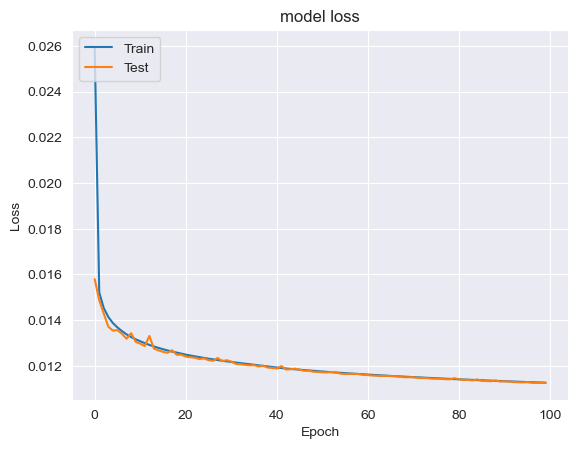

In [52]:
plot_his(history_4)

In [53]:
model_4.evaluate(X_test,Y_test)

6218/6218 [==============================] - 13s 2ms/step - loss: 0.0113 - rmse: 0.0160 - mae: 0.0113 - mse: 2.5533e-04 - mape: 2.8447


[0.011257181875407696,
 0.01597920060157776,
 0.011257181875407696,
 0.00025533486041240394,
 2.844723701477051]

In [54]:
Y_pred_4 = model_4.predict(X_test)

6218/6218 [==============================] - 10s 2ms/step


In [55]:
AIC_value(model_4,Y_pred_4,Y_test)

AIC:  23957.312


# Model 5

In [56]:
%%time
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'linear',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_5 = model_5.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/50
24872/24872 [==============================] - 182s 7ms/step - loss: 0.0595 - rmse: 0.2286 - mae: 0.0595 - mse: 0.0522 - mape: 29.9813 - val_loss: 0.0354 - val_rmse: 0.0393 - val_mae: 0.0354 - val_mse: 0.0015 - val_mape: 5.5878
Epoch 2/50
24872/24872 [==============================] - 174s 7ms/step - loss: 0.0155 - rmse: 0.0208 - mae: 0.0155 - mse: 4.3344e-04 - mape: 3.5780 - val_loss: 0.0117 - val_rmse: 0.0170 - val_mae: 0.0117 - val_mse: 2.9001e-04 - val_mape: 1.8595
Epoch 3/50
24872/24872 [==============================] - 174s 7ms/step - loss: 0.0132 - rmse: 0.0182 - mae: 0.0132 - mse: 3.3074e-04 - mape: 5.8351 - val_loss: 0.0118 - val_rmse: 0.0171 - val_mae: 0.0118 - val_mse: 2.9234e-04 - val_mape: 1.9187
Epoch 4/50
24872/24872 [==============================] - 174s 7ms/step - loss: 0.0121 - rmse: 0.0170 - mae: 0.0121 - mse: 2.9037e-04 - mape: 12.6402 - val_loss: 0.0142 - val_rmse: 0.0184 - val_mae: 0.0142 - val_mse: 3.3824e-04 - val_mape: 2.2104
Epoch 5/50
24872/24872

24872/24872 [==============================] - 176s 7ms/step - loss: 0.0050 - rmse: 0.0074 - mae: 0.0050 - mse: 5.5261e-05 - mape: 26.5067 - val_loss: 0.0050 - val_rmse: 0.0073 - val_mae: 0.0050 - val_mse: 5.3624e-05 - val_mape: 0.8836
Epoch 35/50
24872/24872 [==============================] - 174s 7ms/step - loss: 0.0048 - rmse: 0.0072 - mae: 0.0048 - mse: 5.1799e-05 - mape: 27.1385 - val_loss: 0.0048 - val_rmse: 0.0072 - val_mae: 0.0048 - val_mse: 5.1670e-05 - val_mape: 0.8697
Epoch 36/50
24872/24872 [==============================] - 174s 7ms/step - loss: 0.0047 - rmse: 0.0070 - mae: 0.0047 - mse: 4.8970e-05 - mape: 22.1232 - val_loss: 0.0046 - val_rmse: 0.0071 - val_mae: 0.0046 - val_mse: 5.0061e-05 - val_mape: 0.8852
Epoch 37/50
24872/24872 [==============================] - 175s 7ms/step - loss: 0.0045 - rmse: 0.0068 - mae: 0.0045 - mse: 4.6048e-05 - mape: 24.3839 - val_loss: 0.0042 - val_rmse: 0.0066 - val_mae: 0.0042 - val_mse: 4.2956e-05 - val_mape: 0.8220
Epoch 38/50
24872/24

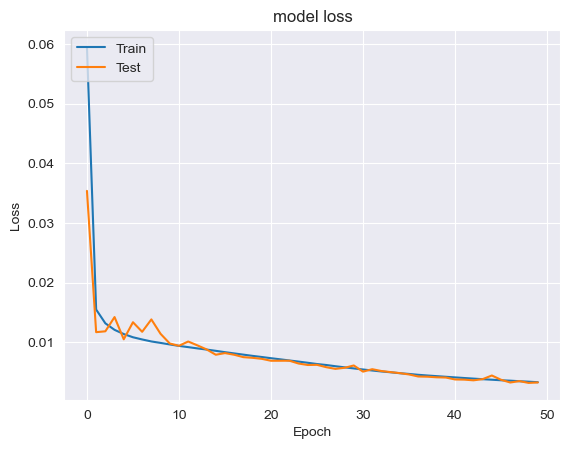

In [57]:
plot_his(history_5)

In [58]:
model_5.evaluate(X_test,Y_test)

6218/6218 [==============================] - 20s 3ms/step - loss: 0.0032 - rmse: 0.0047 - mae: 0.0032 - mse: 2.2353e-05 - mape: 0.6083


[0.0032497465144842863,
 0.00472785159945488,
 0.0032497465144842863,
 2.235258034488652e-05,
 0.608254075050354]

In [59]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


In [60]:
prediction_5 = model_5.predict(X_test)

6218/6218 [==============================] - 18s 3ms/step


In [61]:
AIC_value(model_5,prediction_5,Y_test)

AIC:  25717.3


# Model 6

In [62]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(30,activation= 'linear'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_6 = model_6.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
24872/24872 [==============================] - 208s 8ms/step - loss: 0.0503 - rmse: 0.1945 - mae: 0.0503 - mse: 0.0378 - mape: 11.1262 - val_loss: 0.0173 - val_rmse: 0.0206 - val_mae: 0.0173 - val_mse: 4.2619e-04 - val_mape: 2.1966
Epoch 2/40
24872/24872 [==============================] - 195s 8ms/step - loss: 0.0139 - rmse: 0.0186 - mae: 0.0139 - mse: 3.4544e-04 - mape: 49.2136 - val_loss: 0.0136 - val_rmse: 0.0181 - val_mae: 0.0136 - val_mse: 3.2625e-04 - val_mape: 2.0592
Epoch 3/40
24872/24872 [==============================] - 196s 8ms/step - loss: 0.0111 - rmse: 0.0151 - mae: 0.0111 - mse: 2.2738e-04 - mape: 28.9904 - val_loss: 0.0098 - val_rmse: 0.0139 - val_mae: 0.0098 - val_mse: 1.9337e-04 - val_mape: 1.7135
Epoch 4/40
24872/24872 [==============================] - 196s 8ms/step - loss: 0.0094 - rmse: 0.0128 - mae: 0.0094 - mse: 1.6439e-04 - mape: 23.9184 - val_loss: 0.0094 - val_rmse: 0.0121 - val_mae: 0.0094 - val_mse: 1.4585e-04 - val_mape: 1.4973
Epoch 5/40
24872

24872/24872 [==============================] - 194s 8ms/step - loss: 0.0022 - rmse: 0.0033 - mae: 0.0022 - mse: 1.1017e-05 - mape: 5.8622 - val_loss: 0.0020 - val_rmse: 0.0032 - val_mae: 0.0020 - val_mse: 1.0229e-05 - val_mape: 0.2507
Epoch 35/40
24872/24872 [==============================] - 193s 8ms/step - loss: 0.0021 - rmse: 0.0033 - mae: 0.0021 - mse: 1.0723e-05 - mape: 5.6553 - val_loss: 0.0019 - val_rmse: 0.0031 - val_mae: 0.0019 - val_mse: 9.7219e-06 - val_mape: 0.2389
Epoch 36/40
24872/24872 [==============================] - 192s 8ms/step - loss: 0.0021 - rmse: 0.0032 - mae: 0.0021 - mse: 1.0389e-05 - mape: 6.9237 - val_loss: 0.0026 - val_rmse: 0.0035 - val_mae: 0.0026 - val_mse: 1.1974e-05 - val_mape: 0.2978
Epoch 37/40
24872/24872 [==============================] - 196s 8ms/step - loss: 0.0021 - rmse: 0.0032 - mae: 0.0021 - mse: 1.0138e-05 - mape: 4.0328 - val_loss: 0.0021 - val_rmse: 0.0032 - val_mae: 0.0021 - val_mse: 9.9586e-06 - val_mape: 0.2854
Epoch 38/40
24872/24872 

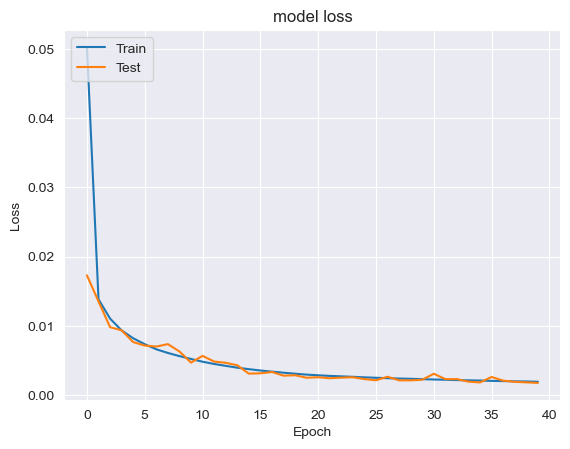

In [63]:
plot_his(history_6)

In [64]:
model_6.evaluate(X_test,Y_test)

6218/6218 [==============================] - 25s 4ms/step - loss: 0.0018 - rmse: 0.0029 - mae: 0.0018 - mse: 8.5644e-06 - mape: 0.2200


[0.0017857055645436049,
 0.002926495159044862,
 0.0017857055645436049,
 8.564374184061307e-06,
 0.22004565596580505]

In [65]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 6, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_16 (Dense)            (None, 20)                620       
                                                                 
 dense_17 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


In [66]:
prediction_6 = model_6.predict(X_test)

6218/6218 [==============================] - 21s 3ms/step


In [67]:
AIC_value(model_6,prediction_6,Y_test)

AIC:  65857.3


# Model 7

In [68]:
%%time
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([tf.keras.layers.LSTM(30,activation= 'linear',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_7 = model_7.fit(X_train,Y_train,batch_size = 128,epochs=70,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/70
6218/6218 [==============================] - 59s 9ms/step - loss: 0.1103 - rmse: 0.3936 - mae: 0.1103 - mse: 0.1549 - mape: 29.7926 - val_loss: 0.0154 - val_rmse: 0.0226 - val_mae: 0.0154 - val_mse: 5.0869e-04 - val_mape: 2.8399
Epoch 2/70
6218/6218 [==============================] - 53s 8ms/step - loss: 0.0253 - rmse: 0.0331 - mae: 0.0253 - mse: 0.0011 - mape: 42.7894 - val_loss: 0.0132 - val_rmse: 0.0190 - val_mae: 0.0132 - val_mse: 3.5989e-04 - val_mape: 2.5178
Epoch 3/70
6218/6218 [==============================] - 52s 8ms/step - loss: 0.0184 - rmse: 0.0246 - mae: 0.0184 - mse: 6.0425e-04 - mape: 44.5629 - val_loss: 0.0134 - val_rmse: 0.0186 - val_mae: 0.0134 - val_mse: 3.4413e-04 - val_mape: 2.4449
Epoch 4/70
6218/6218 [==============================] - 52s 8ms/step - loss: 0.0156 - rmse: 0.0211 - mae: 0.0156 - mse: 4.4703e-04 - mape: 49.8353 - val_loss: 0.0132 - val_rmse: 0.0182 - val_mae: 0.0132 - val_mse: 3.3277e-04 - val_mape: 2.4312
Epoch 5/70
6218/6218 [==========

6218/6218 [==============================] - 54s 9ms/step - loss: 0.0082 - rmse: 0.0128 - mae: 0.0082 - mse: 1.6324e-04 - mape: 3.9591 - val_loss: 0.0080 - val_rmse: 0.0125 - val_mae: 0.0080 - val_mse: 1.5630e-04 - val_mape: 1.3339
Epoch 35/70
6218/6218 [==============================] - 50s 8ms/step - loss: 0.0081 - rmse: 0.0126 - mae: 0.0081 - mse: 1.5993e-04 - mape: 13.0378 - val_loss: 0.0081 - val_rmse: 0.0125 - val_mae: 0.0081 - val_mse: 1.5650e-04 - val_mape: 1.3265
Epoch 36/70
6218/6218 [==============================] - 54s 9ms/step - loss: 0.0080 - rmse: 0.0126 - mae: 0.0080 - mse: 1.5759e-04 - mape: 9.4121 - val_loss: 0.0080 - val_rmse: 0.0127 - val_mae: 0.0080 - val_mse: 1.6142e-04 - val_mape: 1.3150
Epoch 37/70
6218/6218 [==============================] - 54s 9ms/step - loss: 0.0079 - rmse: 0.0124 - mae: 0.0079 - mse: 1.5477e-04 - mape: 16.4212 - val_loss: 0.0076 - val_rmse: 0.0124 - val_mae: 0.0076 - val_mse: 1.5351e-04 - val_mape: 1.2875
Epoch 38/70
6218/6218 [===========

6218/6218 [==============================] - 58s 9ms/step - loss: 0.0057 - rmse: 0.0100 - mae: 0.0057 - mse: 9.9312e-05 - mape: 26.2802 - val_loss: 0.0056 - val_rmse: 0.0100 - val_mae: 0.0056 - val_mse: 1.0098e-04 - val_mape: 0.9915
Epoch 68/70
6218/6218 [==============================] - 55s 9ms/step - loss: 0.0056 - rmse: 0.0098 - mae: 0.0056 - mse: 9.6341e-05 - mape: 29.1423 - val_loss: 0.0059 - val_rmse: 0.0100 - val_mae: 0.0059 - val_mse: 9.9005e-05 - val_mape: 1.0330
Epoch 69/70
6218/6218 [==============================] - 56s 9ms/step - loss: 0.0056 - rmse: 0.0097 - mae: 0.0056 - mse: 9.4216e-05 - mape: 23.3783 - val_loss: 0.0054 - val_rmse: 0.0097 - val_mae: 0.0054 - val_mse: 9.3555e-05 - val_mape: 0.9963
Epoch 70/70
6218/6218 [==============================] - 54s 9ms/step - loss: 0.0055 - rmse: 0.0096 - mae: 0.0055 - mse: 9.2386e-05 - mape: 28.5131 - val_loss: 0.0055 - val_rmse: 0.0096 - val_mae: 0.0055 - val_mse: 9.2425e-05 - val_mape: 0.9443
CPU times: total: 2h 45min 52s
W

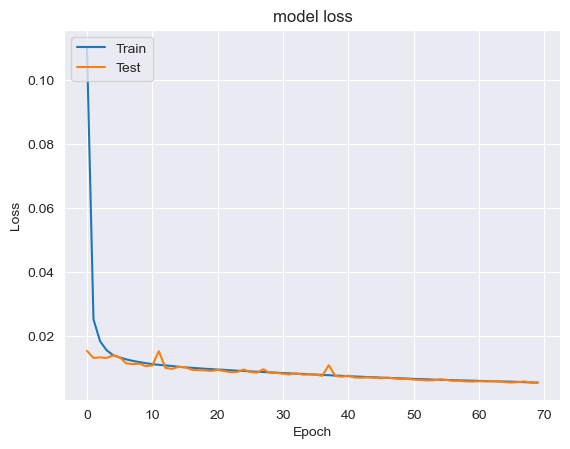

In [69]:
plot_his(history_7)

In [70]:
prediction_7 = model_7.predict(X_test)

6218/6218 [==============================] - 19s 3ms/step


In [71]:
model_7.evaluate(X_test,Y_test)

6218/6218 [==============================] - 23s 4ms/step - loss: 0.0055 - rmse: 0.0096 - mae: 0.0055 - mse: 9.2425e-05 - mape: 0.9443


[0.005481875967234373,
 0.009613811038434505,
 0.005481875967234373,
 9.242535452358425e-05,
 0.9442865252494812]

In [72]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 6, 30)             3840      
                                                                 
 lstm_5 (LSTM)               (None, 10)                1640      
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


In [73]:
AIC_value(model_7,prediction_7,Y_test)

AIC:  11217.296


# Model 8

In [74]:
%%time
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(30,activation= 'relu'),
                               tf.keras.layers.Dense(20,activation='linear'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_8 = model_8.fit(X_train,Y_train,batch_size=64,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
12436/12436 [==============================] - 156s 12ms/step - loss: 0.0619 - rmse: 0.2460 - mae: 0.0619 - mse: 0.0605 - mape: 86.3736 - val_loss: 0.0150 - val_rmse: 0.0230 - val_mae: 0.0150 - val_mse: 5.2715e-04 - val_mape: 2.9539
Epoch 2/40
12436/12436 [==============================] - 144s 12ms/step - loss: 0.0143 - rmse: 0.0215 - mae: 0.0143 - mse: 4.6431e-04 - mape: 41.3642 - val_loss: 0.0124 - val_rmse: 0.0196 - val_mae: 0.0124 - val_mse: 3.8582e-04 - val_mape: 2.4340
Epoch 3/40
12436/12436 [==============================] - 150s 12ms/step - loss: 0.0131 - rmse: 0.0201 - mae: 0.0131 - mse: 4.0250e-04 - mape: 41.9504 - val_loss: 0.0121 - val_rmse: 0.0188 - val_mae: 0.0121 - val_mse: 3.5476e-04 - val_mape: 2.4318
Epoch 4/40
12436/12436 [==============================] - 145s 12ms/step - loss: 0.0126 - rmse: 0.0194 - mae: 0.0126 - mse: 3.7694e-04 - mape: 37.9900 - val_loss: 0.0119 - val_rmse: 0.0187 - val_mae: 0.0119 - val_mse: 3.4955e-04 - val_mape: 2.3091
Epoch 5/40
1

Epoch 34/40
12436/12436 [==============================] - 131s 11ms/step - loss: 0.0105 - rmse: 0.0165 - mae: 0.0105 - mse: 2.7372e-04 - mape: 24.7173 - val_loss: 0.0105 - val_rmse: 0.0167 - val_mae: 0.0105 - val_mse: 2.7822e-04 - val_mape: 1.8178
Epoch 35/40
12436/12436 [==============================] - 131s 11ms/step - loss: 0.0105 - rmse: 0.0165 - mae: 0.0105 - mse: 2.7244e-04 - mape: 24.1556 - val_loss: 0.0104 - val_rmse: 0.0166 - val_mae: 0.0104 - val_mse: 2.7490e-04 - val_mape: 1.8166
Epoch 36/40
12436/12436 [==============================] - 131s 11ms/step - loss: 0.0105 - rmse: 0.0165 - mae: 0.0105 - mse: 2.7156e-04 - mape: 25.0043 - val_loss: 0.0106 - val_rmse: 0.0165 - val_mae: 0.0106 - val_mse: 2.7110e-04 - val_mape: 1.7687
Epoch 37/40
12436/12436 [==============================] - 130s 10ms/step - loss: 0.0104 - rmse: 0.0164 - mae: 0.0104 - mse: 2.7048e-04 - mape: 24.4359 - val_loss: 0.0103 - val_rmse: 0.0165 - val_mae: 0.0103 - val_mse: 2.7093e-04 - val_mape: 1.7805
Epoc

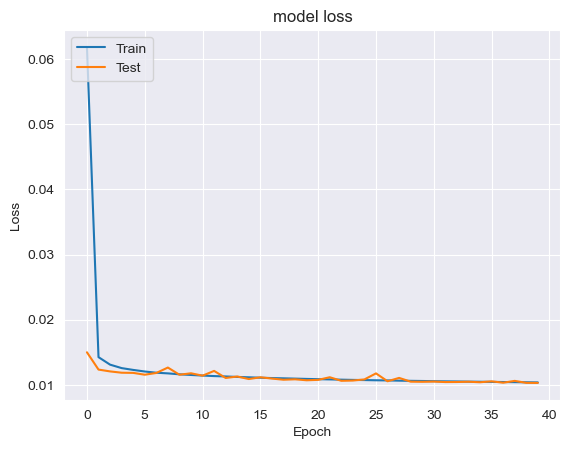

In [75]:
plot_his(history_8)

In [76]:
prediction_8 = model_8.predict(X_test)

6218/6218 [==============================] - 22s 3ms/step


In [77]:
model_8.evaluate(X_test,Y_test)

6218/6218 [==============================] - 26s 4ms/step - loss: 0.0103 - rmse: 0.0163 - mae: 0.0103 - mse: 2.6705e-04 - mape: 1.7433


[0.010311577469110489,
 0.016341691836714745,
 0.010311577469110489,
 0.00026705089840106666,
 1.7433381080627441]

In [78]:
AIC_value(model_8,prediction_8,Y_test)

AIC:  65857.3


# Model 9

In [79]:
%%time
model_9 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1)])

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_9 = model_9.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
24872/24872 [==============================] - 70s 3ms/step - loss: 0.0607 - rmse: 0.2303 - mae: 0.0607 - mse: 0.0531 - mape: 14.9788 - val_loss: 0.0214 - val_rmse: 0.0320 - val_mae: 0.0214 - val_mse: 0.0010 - val_mape: 3.0974
Epoch 2/50
24872/24872 [==============================] - 69s 3ms/step - loss: 0.0212 - rmse: 0.0307 - mae: 0.0212 - mse: 9.4441e-04 - mape: 21.3154 - val_loss: 0.0202 - val_rmse: 0.0298 - val_mae: 0.0202 - val_mse: 8.8869e-04 - val_mape: 3.0605
Epoch 3/50
24872/24872 [==============================] - 69s 3ms/step - loss: 0.0204 - rmse: 0.0296 - mae: 0.0204 - mse: 8.7746e-04 - mape: 39.5538 - val_loss: 0.0200 - val_rmse: 0.0289 - val_mae: 0.0200 - val_mse: 8.3733e-04 - val_mape: 3.0120
Epoch 4/50
24872/24872 [==============================] - 69s 3ms/step - loss: 0.0201 - rmse: 0.0292 - mae: 0.0201 - mse: 8.5332e-04 - mape: 38.6922 - val_loss: 0.0195 - val_rmse: 0.0287 - val_mae: 0.0195 - val_mse: 8.2638e-04 - val_mape: 3.1928
Epoch 5/50
24872/24872 [

24872/24872 [==============================] - 68s 3ms/step - loss: 0.0191 - rmse: 0.0279 - mae: 0.0191 - mse: 7.7807e-04 - mape: 46.8297 - val_loss: 0.0190 - val_rmse: 0.0279 - val_mae: 0.0190 - val_mse: 7.7893e-04 - val_mape: 3.5203
Epoch 35/50
24872/24872 [==============================] - 67s 3ms/step - loss: 0.0191 - rmse: 0.0279 - mae: 0.0191 - mse: 7.7745e-04 - mape: 51.1253 - val_loss: 0.0190 - val_rmse: 0.0278 - val_mae: 0.0190 - val_mse: 7.7094e-04 - val_mape: 3.4696
Epoch 36/50
24872/24872 [==============================] - 66s 3ms/step - loss: 0.0191 - rmse: 0.0279 - mae: 0.0191 - mse: 7.7749e-04 - mape: 51.1652 - val_loss: 0.0190 - val_rmse: 0.0280 - val_mae: 0.0190 - val_mse: 7.8549e-04 - val_mape: 3.5285
Epoch 37/50
24872/24872 [==============================] - 67s 3ms/step - loss: 0.0191 - rmse: 0.0279 - mae: 0.0191 - mse: 7.7726e-04 - mape: 49.3370 - val_loss: 0.0190 - val_rmse: 0.0278 - val_mae: 0.0190 - val_mse: 7.7506e-04 - val_mape: 3.5600
Epoch 38/50
24872/24872 

In [80]:
model_9.evaluate(X_test,Y_test)

6218/6218 [==============================] - 12s 2ms/step - loss: 0.0189 - rmse: 0.0278 - mae: 0.0189 - mse: 7.7146e-04 - mape: 3.5405


[0.018899723887443542,
 0.027775194495916367,
 0.018899723887443542,
 0.000771461462136358,
 3.5404603481292725]

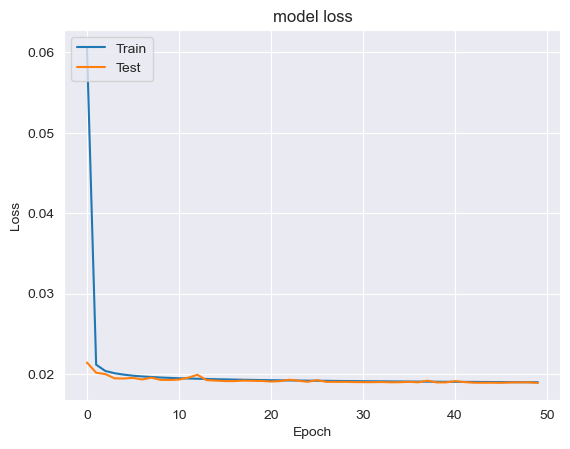

In [81]:
plot_his(history_9)

In [82]:
prediction_9 = model_9.predict(X_test)

6218/6218 [==============================] - 10s 2ms/step


In [83]:
AIC_value(model_9,prediction_9,Y_test)

AIC:  757.3048


# Model 10

In [84]:
%%time
model_10 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1,activation='linear')])

model_10.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_10 = model_10.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 82s 3ms/step - loss: 0.0312 - rmse: 0.1335 - mae: 0.0312 - mse: 0.0178 - mape: 27.0386 - val_loss: 0.0162 - val_rmse: 0.0268 - val_mae: 0.0162 - val_mse: 7.1646e-04 - val_mape: 3.4534
Epoch 2/100
24872/24872 [==============================] - 79s 3ms/step - loss: 0.0145 - rmse: 0.0243 - mae: 0.0145 - mse: 5.9229e-04 - mape: 6.8384 - val_loss: 0.0120 - val_rmse: 0.0215 - val_mae: 0.0120 - val_mse: 4.6241e-04 - val_mape: 3.7377
Epoch 3/100
24872/24872 [==============================] - 80s 3ms/step - loss: 0.0110 - rmse: 0.0196 - mae: 0.0110 - mse: 3.8391e-04 - mape: 11.8748 - val_loss: 0.0099 - val_rmse: 0.0187 - val_mae: 0.0099 - val_mse: 3.4895e-04 - val_mape: 2.4229
Epoch 4/100
24872/24872 [==============================] - 80s 3ms/step - loss: 0.0097 - rmse: 0.0176 - mae: 0.0097 - mse: 3.0877e-04 - mape: 7.3227 - val_loss: 0.0092 - val_rmse: 0.0169 - val_mae: 0.0092 - val_mse: 2.8678e-04 - val_mape: 1.5909
Epoch 5/100
24872/

24872/24872 [==============================] - 79s 3ms/step - loss: 0.0066 - rmse: 0.0125 - mae: 0.0066 - mse: 1.5742e-04 - mape: 44.3210 - val_loss: 0.0066 - val_rmse: 0.0125 - val_mae: 0.0066 - val_mse: 1.5644e-04 - val_mape: 1.4421
Epoch 35/100
24872/24872 [==============================] - 77s 3ms/step - loss: 0.0066 - rmse: 0.0125 - mae: 0.0066 - mse: 1.5692e-04 - mape: 44.0860 - val_loss: 0.0066 - val_rmse: 0.0124 - val_mae: 0.0066 - val_mse: 1.5442e-04 - val_mape: 1.4297
Epoch 36/100
24872/24872 [==============================] - 78s 3ms/step - loss: 0.0066 - rmse: 0.0125 - mae: 0.0066 - mse: 1.5606e-04 - mape: 46.1449 - val_loss: 0.0066 - val_rmse: 0.0125 - val_mae: 0.0066 - val_mse: 1.5720e-04 - val_mape: 1.5444
Epoch 37/100
24872/24872 [==============================] - 77s 3ms/step - loss: 0.0066 - rmse: 0.0125 - mae: 0.0066 - mse: 1.5516e-04 - mape: 43.2156 - val_loss: 0.0065 - val_rmse: 0.0126 - val_mae: 0.0065 - val_mse: 1.5996e-04 - val_mape: 1.5697
Epoch 38/100
24872/24

24872/24872 [==============================] - 76s 3ms/step - loss: 0.0063 - rmse: 0.0117 - mae: 0.0063 - mse: 1.3722e-04 - mape: 43.8673 - val_loss: 0.0063 - val_rmse: 0.0119 - val_mae: 0.0063 - val_mse: 1.4122e-04 - val_mape: 1.7445
Epoch 68/100
24872/24872 [==============================] - 77s 3ms/step - loss: 0.0063 - rmse: 0.0117 - mae: 0.0063 - mse: 1.3692e-04 - mape: 42.8225 - val_loss: 0.0063 - val_rmse: 0.0118 - val_mae: 0.0063 - val_mse: 1.3850e-04 - val_mape: 1.7014
Epoch 69/100
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0063 - rmse: 0.0117 - mae: 0.0063 - mse: 1.3641e-04 - mape: 43.3435 - val_loss: 0.0064 - val_rmse: 0.0118 - val_mae: 0.0064 - val_mse: 1.3951e-04 - val_mape: 1.7520
Epoch 70/100
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0063 - rmse: 0.0117 - mae: 0.0063 - mse: 1.3581e-04 - mape: 43.7317 - val_loss: 0.0063 - val_rmse: 0.0118 - val_mae: 0.0063 - val_mse: 1.4003e-04 - val_mape: 1.7913
Epoch 71/100
24872/24

24872/24872 [==============================] - 78s 3ms/step - loss: 0.0061 - rmse: 0.0114 - mae: 0.0061 - mse: 1.2887e-04 - mape: 40.8635 - val_loss: 0.0061 - val_rmse: 0.0115 - val_mae: 0.0061 - val_mse: 1.3158e-04 - val_mape: 1.8548
CPU times: total: 3h 17min 23s
Wall time: 2h 9min 55s


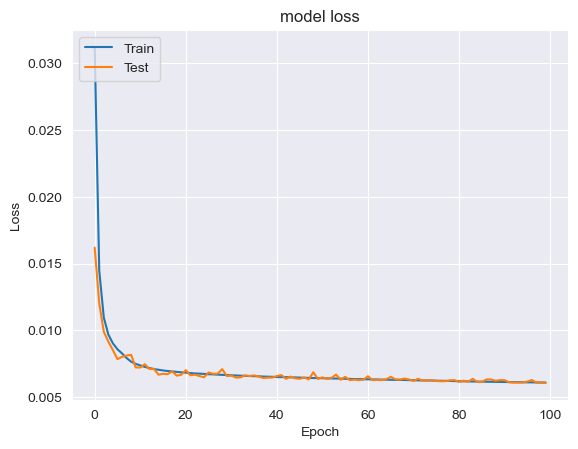

In [85]:
plot_his(history_10)

In [86]:
model_10.evaluate(X_test,Y_test)

6218/6218 [==============================] - 13s 2ms/step - loss: 0.0061 - rmse: 0.0115 - mae: 0.0061 - mse: 1.3158e-04 - mape: 1.8548


[0.0060713826678693295,
 0.011470861732959747,
 0.0060713826678693295,
 0.00013158067304175347,
 1.8547544479370117]

In [87]:
prediction_10 = model_10.predict(X_test)

6218/6218 [==============================] - 11s 2ms/step


In [88]:
AIC_value(model_10,prediction_10,Y_test)

AIC:  2377.299


# Model 11

In [ ]:
%%time
model_11 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(32,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(32,activation="linear"),
                               tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1,activation ='linear')])

model_11.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_11 = model_11.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 81s 3ms/step - loss: 0.0646 - rmse: 0.2911 - mae: 0.0646 - mse: 0.0847 - mape: 58.7264 - val_loss: 0.0225 - val_rmse: 0.0340 - val_mae: 0.0225 - val_mse: 0.0012 - val_mape: 3.3256
Epoch 2/100
24872/24872 [==============================] - 80s 3ms/step - loss: 0.0210 - rmse: 0.0306 - mae: 0.0210 - mse: 9.3842e-04 - mape: 61.7162 - val_loss: 0.0205 - val_rmse: 0.0294 - val_mae: 0.0205 - val_mse: 8.6664e-04 - val_mape: 3.3019
Epoch 3/100
24872/24872 [==============================] - 79s 3ms/step - loss: 0.0201 - rmse: 0.0287 - mae: 0.0201 - mse: 8.2463e-04 - mape: 45.7641 - val_loss: 0.0198 - val_rmse: 0.0285 - val_mae: 0.0198 - val_mse: 8.0971e-04 - val_mape: 3.0299
Epoch 4/100
24872/24872 [==============================] - 79s 3ms/step - loss: 0.0197 - rmse: 0.0281 - mae: 0.0197 - mse: 7.9054e-04 - mape: 42.2429 - val_loss: 0.0196 - val_rmse: 0.0281 - val_mae: 0.0196 - val_mse: 7.8882e-04 - val_mape: 2.9849
Epoch 5/100
24872/24

24872/24872 [==============================] - 83s 3ms/step - loss: 0.0171 - rmse: 0.0252 - mae: 0.0171 - mse: 6.3670e-04 - mape: 22.8142 - val_loss: 0.0170 - val_rmse: 0.0253 - val_mae: 0.0170 - val_mse: 6.3826e-04 - val_mape: 2.7183
Epoch 35/100
24872/24872 [==============================] - 80s 3ms/step - loss: 0.0171 - rmse: 0.0252 - mae: 0.0171 - mse: 6.3559e-04 - mape: 21.5309 - val_loss: 0.0170 - val_rmse: 0.0252 - val_mae: 0.0170 - val_mse: 6.3694e-04 - val_mape: 2.7189
Epoch 36/100
24872/24872 [==============================] - 82s 3ms/step - loss: 0.0170 - rmse: 0.0252 - mae: 0.0170 - mse: 6.3450e-04 - mape: 21.9708 - val_loss: 0.0170 - val_rmse: 0.0252 - val_mae: 0.0170 - val_mse: 6.3632e-04 - val_mape: 2.7235
Epoch 37/100
24872/24872 [==============================] - 79s 3ms/step - loss: 0.0170 - rmse: 0.0252 - mae: 0.0170 - mse: 6.3360e-04 - mape: 22.6720 - val_loss: 0.0169 - val_rmse: 0.0252 - val_mae: 0.0169 - val_mse: 6.3501e-04 - val_mape: 2.7279
Epoch 38/100
24872/24

In [ ]:
plot_his(history_11)

In [ ]:
model_11.evaluate(X_test,Y_test)

In [ ]:
prediction_11 = model_11.predict(X_test)

In [ ]:
AIC_value(model_11,prediction_11,Y_test)

# Model 12

In [ ]:
%%time
model_12 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(8,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_12.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_12 = model_12.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

In [ ]:
plot_his(history_12)

In [ ]:
model_12.evaluate(X_test,Y_test)

In [ ]:
prediction_12 = model_12.predict(X_test)

In [ ]:
AIC_value(model_12,prediction_12,Y_test)

In [ ]:
# AIC_value(model_1,Y_pred_1,Y_test)
# AIC_value(model_2,Y_pred_2,Y_test)
# AIC_value(model_3,Y_pred_3,Y_test)
# AIC_value(model_4,Y_pred_4,Y_test)
# AIC_value(model_5,prediction_5,Y_test)
# AIC_value(model_6,prediction_6,Y_test)
# AIC_value(model_7,prediction_7[:198976],Y_test)
# AIC_value(model_8,prediction_8,Y_test)
# AIC_value(model_9,prediction_9,Y_test)
# AIC_value(model_10,prediction_10,Y_test)
# AIC_value(model_11,prediction_11,Y_test)
# AIC_value(model_12,prediction_12,Y_test)


In [ ]:
model_1.save('Saved_models/model_1_Energyesti.h5')

In [ ]:
model_2.save('Saved_models/model_2_Energyesti.h5')

In [ ]:
model_3.save('Saved_models/model_3_Energyesti.h5')

In [ ]:
model_4.save('Saved_models/model_4_Energyesti.h5')

In [ ]:
model_5.save('Saved_models/model_5_Energyesti.h5')

In [ ]:
model_6.save('Saved_models/model_6_Energyesti.h5')

In [ ]:
model_7.save('Saved_models/model_7_Energyesti.h5')

In [ ]:
model_8.save('Saved_models/model_8_Energyesti.h5')

In [ ]:
model_9.save('Saved_models/model_9_Energyesti.h5')

In [ ]:
model_10.save('Saved_models/model_10_Energyesti.h5')

In [ ]:
model_11.save('Saved_models/model_11_Energyesti.h5')

In [ ]:
model_12.save('Saved_models/model_12_Energyesti.h5')

In [ ]:
AIC_score = { 'DNN_1':11477.36,'DNN_2':11817.26,'DNN_3':9277.26,'DNN_4':9277.26,'CNN_1':25717.27,
              'CNN_2':65857.26,'CNN_3_X':11217.26,'CNN_4':65857.26,'LSTM_1':777.26,
             'LSTM_2':2777.26, 'LSTM_3':13777.27, 'LSTM_4':1653.38 }
names = list(AIC_score.keys())
values = list(AIC_score.values())


plt.figure(figsize=(10,6))
plt.bar(range(len(AIC_score)), values, tick_label=names,color='green')

plt.title('Akaike Information Criteria')
plt.show()

In [ ]:
df.head()

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(Y,color='r')
plt.plot(Y_pred_2,color='g')
plt.ylabel('SOC')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Real Vs Predicted')